In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML

In [12]:
#Leo mi archivo.csv
Covid = pd.read_csv("COVID19MEXICO.csv")
#Filtro por filas
Covid= Covid.iloc[0:100000,: ]
Covid


C:\Users\mafer\AppData\Local\Temp\ipykernel_17764\3657084836.py:2: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,NaN,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,NaN,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97


In [13]:
valores_nulos=Covid.isnull().sum()
valores_nulos

Unnamed: 0               0
FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   1
ENTIDAD_UM               1
SEXO                     1
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            1
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     3
NACIONALIDAD             0
EMBARAZO                 2
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             1
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               1
OTRO_CASO                1
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       1
CLASIFICACION_FINAL      0
M

In [14]:
valores_nulos=Covid.isnull().sum().sum()
valores_nulos

15

Como los valores nulos en su mayoría son cualitativos, elegimos trabajarlos con el método de "ffill", esto también nos permite no eliminar los demás datos de las filas.

In [15]:
Covid1= Covid.fillna(method="ffill")
valores_nulos=Covid1.isnull().sum().sum()
valores_nulos

0

**OUTLIERS**

In [16]:
Covid1.info()
Covid1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100000 non-null  int64  
 1   FECHA_ACTUALIZACION    100000 non-null  object 
 2   ID_REGISTRO            100000 non-null  object 
 3   ORIGEN                 100000 non-null  int64  
 4   SECTOR                 100000 non-null  float64
 5   ENTIDAD_UM             100000 non-null  float64
 6   SEXO                   100000 non-null  float64
 7   ENTIDAD_NAC            100000 non-null  int64  
 8   ENTIDAD_RES            100000 non-null  int64  
 9   MUNICIPIO_RES          100000 non-null  float64
 10  TIPO_PACIENTE          100000 non-null  int64  
 11  FECHA_INGRESO          100000 non-null  object 
 12  FECHA_SINTOMAS         100000 non-null  object 
 13  FECHA_DEF              100000 non-null  object 
 14  INTUBADO               100000 non-nul

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,12.0,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,9.0,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97


<Figure size 1080x576 with 0 Axes>

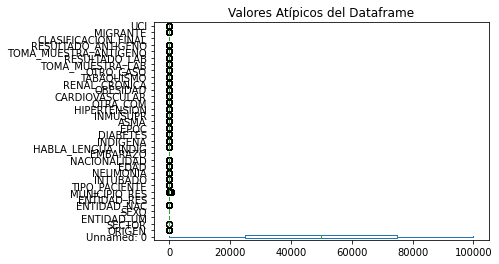

In [17]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Covid1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

Como este dataframe consiste en su mayoría de variables binarias con respuestas (1 y 2) no podemos encontrar outliers; además, existen variables importantes como el sector, entidad o municipio que tampoco les podemos eliminar datos porque perderíamos información valiosa.
Sin embargo, una variable que sí podemos revisar es "EDAD"

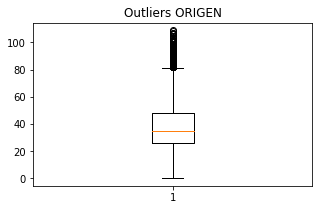

In [24]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(Covid1["EDAD"]) 
plt.title("Outliers ORIGEN")
plt.show() #dibujamos el diagrama

***PROCEDIMIENTO "CUANTILES" PARA ELIMINAR OUTLIERS EN DATAFRAME***

In [25]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Covid1["EDAD"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 81.0
Limite inferior permitido -7.0


In [26]:
#Encontramos Outliers del Dataframe
outliers_iqr= Covid1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
51,51,27/08/2022,100caf,1,6.0,17.0,1.0,21,17,1.0,...,2.0,2,97,1,2.0,1,99,México,97,2
159,159,27/08/2022,31c7f5,1,12.0,9.0,1.0,9,9,10.0,...,1.0,2,97,1,1.0,3,99,México,97,97
250,250,27/08/2022,3a2068,1,12.0,3.0,2.0,99,3,2.0,...,2.0,2,97,2,97.0,6,1,Estados Unidos de América,Estados Unidos de América,97
337,337,27/08/2022,4f8b86,2,12.0,22.0,1.0,22,22,14.0,...,2.0,2,97,1,2.0,7,99,México,97,97
538,538,27/08/2022,7f6947,2,12.0,14.0,1.0,14,14,38.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98183,98183,27/08/2022,b3c459,2,6.0,24.0,2.0,24,24,24.0,...,2.0,2,97,1,1.0,3,99,México,97,97
98851,98851,27/08/2022,d2ba66,2,4.0,25.0,2.0,25,25,9.0,...,2.0,1,1,1,1.0,3,99,México,97,2
98908,98908,27/08/2022,b8ca22,2,12.0,32.0,1.0,32,32,10.0,...,2.0,2,97,1,1.0,3,99,México,97,97
98918,98918,27/08/2022,b25c23,1,4.0,9.0,1.0,9,9,10.0,...,2.0,2,97,1,1.0,3,99,México,97,2


In [27]:
#Obtenemos datos limpios del Dataframe
Covid2= Covid1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Covid2

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,12.0,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,9.0,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97


In [28]:
#Comprobamos si tenemos valores nulos
valores_nulos=Covid2.isnull().sum().sum()
valores_nulos

0

In [30]:
#Convertir DataFrame a CSV
Covid2.to_csv("Datos_limpios_COVID.csv")

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,12.0,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,9.0,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97
